In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("country_level_data.csv")

In [3]:
codebook = pd.read_csv("country_level_codebook.csv")

In [4]:
codebook.head()

,regionID,iso3c,country_name,incomeID,measurement,units,year,source,comments
0,EAS,ASM,American Samoa,UMC,composition_food_organic_waste_percent,%,2011.0,SPREP (Secretariat of the Pacific Regional Env...,NaN
1,EAS,ASM,American Samoa,UMC,composition_glass_percent,%,2011.0,SPREP (Secretariat of the Pacific Regional Env...,NaN
2,EAS,ASM,American Samoa,UMC,composition_metal_percent,%,2011.0,SPREP (Secretariat of the Pacific Regional Env...,NaN
3,EAS,ASM,American Samoa,UMC,composition_other_percent,%,2011.0,SPREP (Secretariat of the Pacific Regional Env...,7; 8; 9; other includes disposable diaper (5.5...
4,EAS,ASM,American Samoa,UMC,composition_paper_cardboard_percent,%,2011.0,SPREP (Secretariat of the Pacific Regional Env...,NaN


In [5]:
df = pd.DataFrame(data)

In [6]:
df.head()

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
0,ABW,LCN,Aruba,HIC,35563.312500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.0,NaN,89.0,NaN,NaN
1,AFG,SAS,Afghanistan,LIC,2057.062256,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
2,AGO,SSF,Angola,LMC,8036.690430,51.8,6.7,4.4,11.50,11.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,ECS,Albania,UMC,13724.058594,51.4,4.5,4.8,15.21,9.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some disposal sites
4,AND,ECS,Andorra,HIC,43711.800781,31.2,8.2,2.6,11.60,35.1,...,NaN,52.1,NaN,NaN,NaN,NaN,NaN,47.9,NaN,NaN


In [7]:
#select only the columns needed
waste_df = df[['iso3c', 'region_id', 'country_name', 'income_id', 'gdp', 'population_population_number_of_people', 'total_msw_total_msw_generated_tons_year']]

In [8]:
waste_df.head()

,iso3c,region_id,country_name,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year
0,ABW,LCN,Aruba,HIC,35563.312500,103187,8.813202e+04
1,AFG,SAS,Afghanistan,LIC,2057.062256,34656032,5.628525e+06
2,AGO,SSF,Angola,LMC,8036.690430,25096150,4.213644e+06
3,ALB,ECS,Albania,UMC,13724.058594,2854191,1.087447e+06
4,AND,ECS,Andorra,HIC,43711.800781,82431,4.300000e+04


In [9]:
#rename columns that need to be renamed
my_df = waste_df.rename(columns={"population_population_number_of_people": "population", "total_msw_total_msw_generated_tons_year": "total_msw_per_year", "iso3c": "iso_code"})
my_df.head()

,iso_code,region_id,country_name,income_id,gdp,population,total_msw_per_year
0,ABW,LCN,Aruba,HIC,35563.312500,103187,8.813202e+04
1,AFG,SAS,Afghanistan,LIC,2057.062256,34656032,5.628525e+06
2,AGO,SSF,Angola,LMC,8036.690430,25096150,4.213644e+06
3,ALB,ECS,Albania,UMC,13724.058594,2854191,1.087447e+06
4,AND,ECS,Andorra,HIC,43711.800781,82431,4.300000e+04


In [10]:
#remove row missing gdp (Sint Maarten (Dutch part)) and row missing total msw (Turks and caicos)
my_df.drop(index=[183, 186], inplace=True)

In [11]:
#add column with total msw per year per capita
my_df['total_msw_per_year_per_capita'] = my_df['total_msw_per_year'] / my_df['population']
my_df.head()

,iso_code,region_id,country_name,income_id,gdp,population,total_msw_per_year,total_msw_per_year_per_capita
0,ABW,LCN,Aruba,HIC,35563.312500,103187,8.813202e+04,0.854100
1,AFG,SAS,Afghanistan,LIC,2057.062256,34656032,5.628525e+06,0.162411
2,AGO,SSF,Angola,LMC,8036.690430,25096150,4.213644e+06,0.167900
3,ALB,ECS,Albania,UMC,13724.058594,2854191,1.087447e+06,0.381000
4,AND,ECS,Andorra,HIC,43711.800781,82431,4.300000e+04,0.521648


In [61]:
# Calculate the total of all values in the 'total_msw_per_year_per_capita' column
total_msw_total = my_df['total_msw_per_year'].sum()

# Create a new DataFrame with the total value
total_row = pd.DataFrame({'country_name': ['Total'], 'total_msw_per_year': [total_msw_total]})

# Concatenate the new row to the original DataFrame
my_df_with_total = pd.concat([my_df, total_row], ignore_index=True)

# Print the DataFrame with the new row
my_df_with_total.tail()




,iso_code,region_id,country_name,income_id,gdp,population,total_msw_per_year,total_msw_per_year_per_capita,income_code
211,YEM,MEA,"Yemen, Rep.",LIC,8269.671875,27584212.0,4.836820e+06,0.175347,1.0
212,ZAF,SSF,South Africa,UMC,12666.607422,51729344.0,1.845723e+07,0.356804,3.0
213,ZMB,SSF,Zambia,LMC,3201.289307,14264756.0,2.608268e+06,0.182847,2.0
214,ZWE,SSF,Zimbabwe,LIC,3190.506592,12500525.0,1.449752e+06,0.115975,1.0
215,NaN,NaN,Total,NaN,NaN,NaN,2.072383e+09,NaN,NaN


/Users/irenestephenson/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/Users/irenestephenson/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


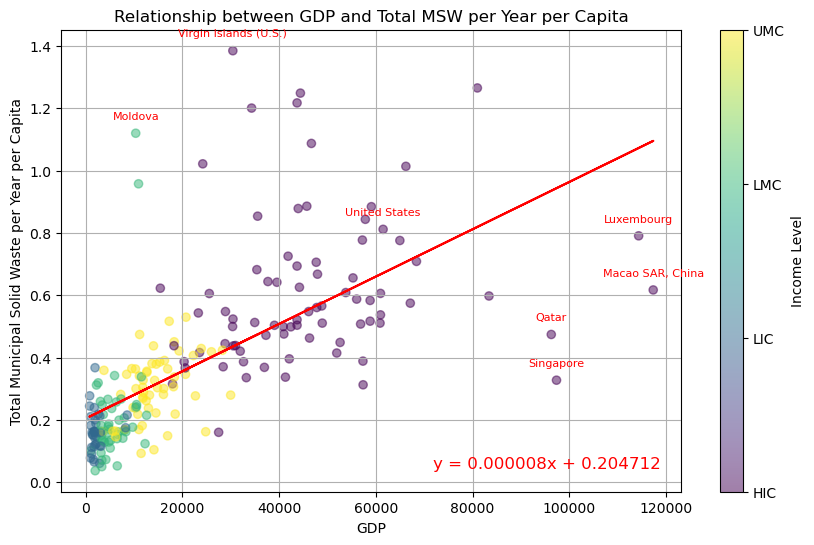

In [62]:
# Define a color mapping dictionary for income_id categories
color_mapping = {'HIC': 0, 'LIC': 1, 'LMC': 2, 'UMC': 3}

# Map income_id to numerical codes
my_df['income_code'] = my_df['income_id'].map(color_mapping)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(my_df['gdp'], my_df['total_msw_per_year_per_capita'], c=my_df['income_code'], cmap='viridis', alpha=0.5)
plt.title('Relationship between GDP and Total MSW per Year per Capita')
plt.xlabel('GDP')
plt.ylabel('Total Municipal Solid Waste per Year per Capita')
plt.grid(True)

# Adding a colorbar for reference
plt.colorbar(scatter, ticks=np.arange(len(color_mapping)), label='Income Level', format=plt.FuncFormatter(lambda val, loc: list(color_mapping.keys())[list(color_mapping.values()).index(val)]))

# Line of best fit
coefficients = np.polyfit(my_df['gdp'], my_df['total_msw_per_year_per_capita'], 1)
slope, intercept = coefficients
plt.plot(my_df['gdp'], slope * my_df['gdp'] + intercept, color='red')

# Equation of the line of best fit
equation = f'y = {slope:.6f}x + {intercept:.6f}'
plt.text(0.6, 0.05, equation, transform=plt.gca().transAxes, fontsize=12, color='red')

# Countries to label
countries_to_label = ['United States', 'Singapore', 'Virgin Islands (U.S.)', 'Qatar', 'Moldova', 'Luxembourg', 'Macao SAR, China']  # Specific countries I am looking into

# Annotate specific countries
for country in countries_to_label:
    country_data = my_df[my_df['country_name'] == country]
    plt.annotate(f'{country}', (country_data['gdp'], country_data['total_msw_per_year_per_capita']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')

plt.show()




In [23]:
coefficients

array([7.59281382e-06, 2.04711695e-01])

In [15]:
# get ANOVA table
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('total_msw_per_year_per_capita ~ gdp', data=my_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
gdp,6.364755,1.0,167.522113,1.188040e-28
Residual,8.092620,213.0,NaN,NaN


In [65]:
intercept = 7.59281382e-06
coefficient_gdp = 2.04711695e-01
GDP_2050 =  60000

# Predict total municipal solid waste per year per capita for 2050
msw_2050_per_capita = coefficient_gdp * GDP_2050 + intercept
msw_2050_per_capita


12282.701707592814

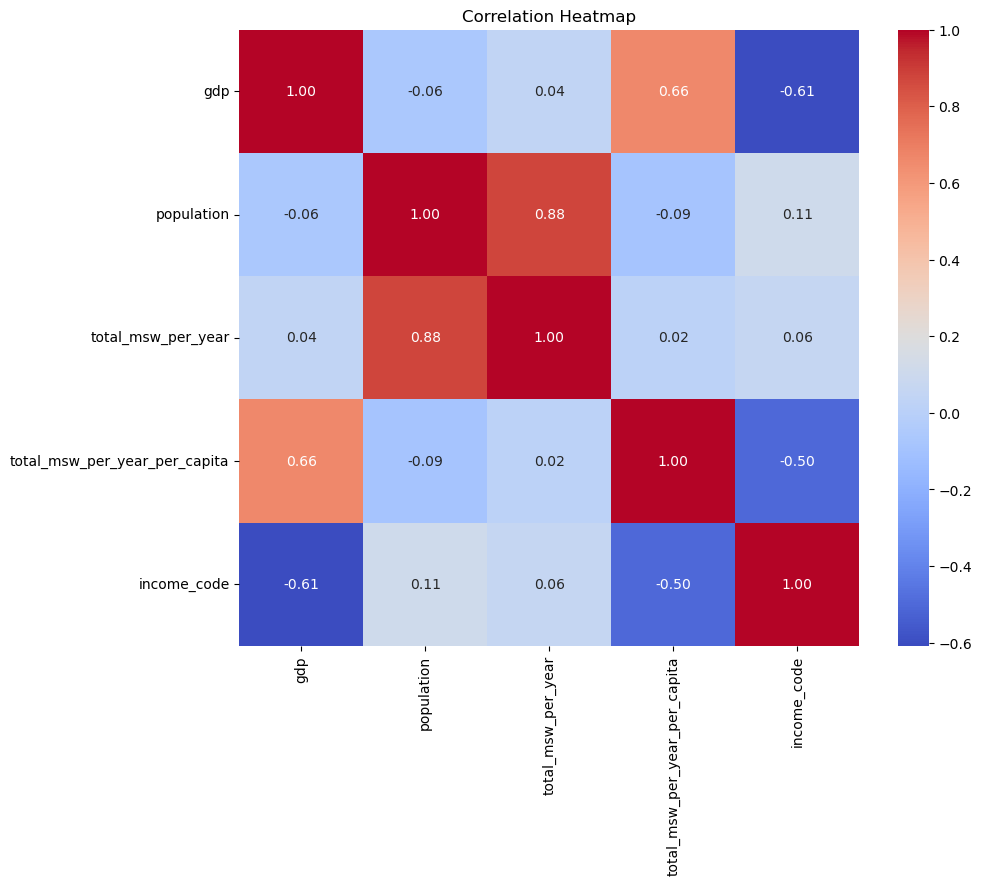

In [68]:
# Dropping non-numeric columns
numeric_df = my_df.select_dtypes(include='number')

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1000x600 with 0 Axes>

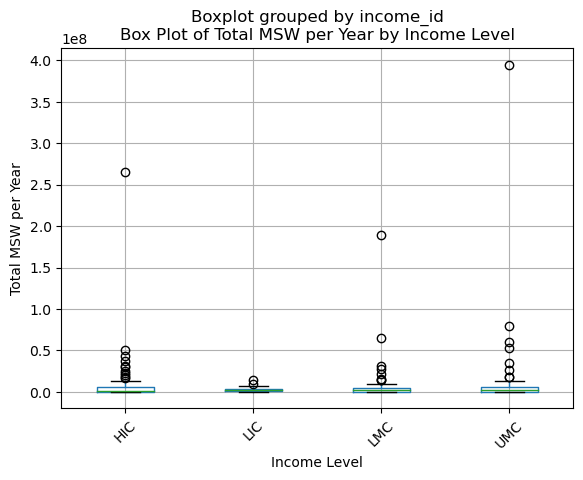

In [70]:
# Assuming you want to create a box plot of 'total_msw_per_year' grouped by 'income_id'
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
my_df.boxplot(column='total_msw_per_year', by='income_id')
plt.title('Box Plot of Total MSW per Year by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Total MSW per Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()
